In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab4.ipynb")

In [2]:
# Imports

# Base
import pandas as pd
import numpy as np
import altair as alt

# Core
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_validate,
    train_test_split,
)

# Processing / Transformation
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline

# Classifiers
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm.sklearn import LGBMClassifier

# Metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_recall_curve,
    f1_score,
    precision_score,
    recall_score,
    accuracy_score,
    make_scorer,
    mean_squared_error,
    r2_score
)


# Lab 4: Putting it all together in a mini project

**This lab is an optional group lab.** You can choose to work alone of in a group of up to four students. You are in charge of how you want to work and who you want to work with. Maybe you really want to go through all the steps of the ML process yourself or maybe you want to practice your collaboration skills, it is up to you! Just remember to indicate who your group members are (if any) when you submit on Gradescope. If you choose to work in a group, you only need to use one of your GitHub repos.

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## Submission instructions
rubric={mechanics}

<p>You receive marks for submitting your lab correctly, please follow these instructions:</p>

<ul>
  <li><a href="https://ubc-mds.github.io/resources_pages/general_lab_instructions/">
      Follow the general lab instructions.</a></li>
  <li><a href="https://github.com/UBC-MDS/public/tree/master/rubric">
      Click here to view a description of the rubrics used to grade the questions</a></li>
  <li>Make at least three commits.</li>
  <li>Push your <code>.ipynb</code> file to your GitHub repository for this lab and upload it to Gradescope.</li>
    <ul>
      <li>Before submitting, make sure you restart the kernel and rerun all cells.</li>
    </ul>
  <li>Also upload a <code>.pdf</code> export of the notebook to facilitate grading of manual questions (preferably WebPDF, you can select two files when uploading to gradescope)</li>
  <li>Don't change any variable names that are given to you, don't move cells around, and don't include any code to install packages in the notebook.</li>
  <li>The data you download for this lab <b>SHOULD NOT BE PUSHED TO YOUR REPOSITORY</b> (there is also a <code>.gitignore</code> in the repo to prevent this).</li>
  <li>Include a clickable link to your GitHub repo for the lab just below this cell
    <ul>
      <li>It should look something like this https://github.ubc.ca/MDS-2020-21/DSCI_531_labX_yourcwl.</li>
    </ul>
  </li>
</ul>
</div>

_Points:_ 2

https://github.com/xFiveRivers/DSCI_573_Lab4_Group_Project

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this lab you will be working on an open-ended mini-project, where you will put all the different things you have learned so far in 571 and 573 together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. Since this mini-project is open-ended there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you instead do a bunch of sane things and you have clearly motivated your choices, but still get lower model performance than your friend, don't sweat it.


#### A final note
Finally, the style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "several hours" but not "many hours" is a good guideline for a high quality submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and we hope you enjoy it as well. 

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
rubric={reasoning}

In this mini project, you will pick one of the following problems: 

1. A classification problem of predicting whether a credit card client will default or not. For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

OR 

2. A regression problem of predicting `reviews_per_month`, as a proxy for the popularity of the listing with [New York City Airbnb listings from 2019 dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 
3. Carry out any preliminary preprocessing, if needed (e.g., changing feature names, handling of NaN values etc.)
    
</div>

_Points:_ 3

**For this lab, a solution will be developed for problem #1.** 

Looking into the data set there are many features initially proposed of which many are relevant to the machine-learning model building process. Features like `ID` and `SEX` as the former contains all unique identifiers for each observation while the latter will introduce an ethical bias into the experiement. The observations that relate to `others` and `unknown` under the `EDUCATION` column will be dropped to only keep `graduate school`, `university`, and `high school` as they have an inherent order. The columns names for the `PAY`, `BILL_AMT`, and `PAY_AMT` features are hard to interpret so they will be renamed to include their respective months. The `default.payment.next.month` column will also be renamed to `TARGET` to keep it short. Under the `MARRIED` column, any values pertaining to `single` or `other` will be converted to `not-married` for simplicity as it is not clear what `other` means, this also helps to create a binary feature. The features that are categorical already have some form of encoding which helps the transformation process down the line for interpretability.

In [3]:
# Read in the csv data
raw_data = pd.read_csv("data/UCI_Credit_Card.csv")

# Drop ID and SEX columns
raw_data = raw_data.drop(columns = ["ID", "SEX"])

# Rename columns for clarity
raw_data = raw_data.rename(columns={
    "PAY_0": "PAY_SEPT",
    "PAY_2": "PAY_AUG",
    "PAY_3": "PAY_JUL",
    "PAY_4": "PAY_JUN",
    "PAY_5": "PAY_MAY",
    "PAY_6": "PAY_APR",
    "BILL_AMT1": "BILL_AMT_SEPT",
    "BILL_AMT2": "BILL_AMT_AUG",
    "BILL_AMT3": "BILL_AMT_JUL",
    "BILL_AMT4": "BILL_AMT_JUN",
    "BILL_AMT5": "BILL_AMT_MAY",
    "BILL_AMT6": "BILL_AMT_APR",
    "PAY_AMT1": "PAY_AMT_SEPT",
    "PAY_AMT2": "PAY_AMT_AUG",
    "PAY_AMT3": "PAY_AMT_JUL",
    "PAY_AMT4": "PAY_AMT_JUN",
    "PAY_AMT5": "PAY_AMT_MAY",
    "PAY_AMT6": "PAY_AMT_APR",
    "default.payment.next.month" : "TARGET"
})

# Remove observations where EDUCATION is other (4) or unknown(5 and 6)
raw_data = raw_data[raw_data.EDUCATION != 4]
raw_data = raw_data[raw_data.EDUCATION != 5]
raw_data = raw_data[raw_data.EDUCATION != 6]

# Mutate all values where MARRIAGE is either single (2) or other (3) into not-married (0)
raw_data.loc[raw_data["MARRIAGE"] == 2, "MARRIAGE"] = 0
raw_data.loc[raw_data["MARRIAGE"] == 3, "MARRIAGE"] = 0

raw_data

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,TARGET
0,20000.0,2,1,24,2,2,-1,-1,-2,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,0,26,-1,2,0,0,0,2,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,0,34,0,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,1,37,0,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,2,1,57,-1,0,-1,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,3,1,39,0,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,3,0,43,-1,-1,-1,-1,0,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,2,0,37,4,3,2,-1,0,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,3,1,41,1,-1,0,0,0,-1,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 2. Data splitting <a name="2"></a>
rubric={reasoning}

**Your tasks:**

1. Split the data into train and test portions.

> Make the decision on the `test_size` based on the capacity of your laptop. 
    
</div>

_Points:_ 1

In [4]:
train_df, test_df = train_test_split(raw_data, test_size=0.3, random_state=123)

X_train = train_df.drop(columns = "TARGET")
y_train = train_df["TARGET"]

X_test = test_df.drop(columns = "TARGET")
y_test = test_df["TARGET"]

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 3. EDA <a name="3"></a>
rubric={viz,reasoning}
    
Perform exploratory data analysis on the train set.

**Your tasks:**

1. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
2. Summarize your initial observations about the data. 
3. Pick appropriate metric/metrics for assessment. 
    
</div>

_Points:_ 6

Part 1/2 - see plots and descriptoins below

Part 3:

We have decided to use a f1 scoring metric to balance recall and percision as we want to balance our type 1 and 2 error. 
Percision is important, as false positive could impact individuals and how much they are lent. 
Recall is important, as the credit card company wants to ensure they are able to identify all positive cases (TPR).

In [5]:
# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20682 entries, 10945 to 20206
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LIMIT_BAL      20682 non-null  float64
 1   EDUCATION      20682 non-null  int64  
 2   MARRIAGE       20682 non-null  int64  
 3   AGE            20682 non-null  int64  
 4   PAY_SEPT       20682 non-null  int64  
 5   PAY_AUG        20682 non-null  int64  
 6   PAY_JUL        20682 non-null  int64  
 7   PAY_JUN        20682 non-null  int64  
 8   PAY_MAY        20682 non-null  int64  
 9   PAY_APR        20682 non-null  int64  
 10  BILL_AMT_SEPT  20682 non-null  float64
 11  BILL_AMT_AUG   20682 non-null  float64
 12  BILL_AMT_JUL   20682 non-null  float64
 13  BILL_AMT_JUN   20682 non-null  float64
 14  BILL_AMT_MAY   20682 non-null  float64
 15  BILL_AMT_APR   20682 non-null  float64
 16  PAY_AMT_SEPT   20682 non-null  float64
 17  PAY_AMT_AUG    20682 non-null  float64
 18  PA

In [7]:
train_df.describe()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,TARGET
count,20682.000000,20682.000000,20682.000000,20682.000000,20682.000000,20682.000000,20682.000000,20682.000000,20682.000000,20682.000000,...,20682.000000,20682.000000,20682.000000,20682.000000,2.068200e+04,20682.000000,20682.000000,20682.000000,20682.000000,20682.000000
mean,167338.443091,1.808336,0.451939,35.476501,-0.018567,-0.134755,-0.167730,-0.218548,-0.265303,-0.290301,...,43309.036699,40355.203414,39088.877478,5573.361812,5.976563e+03,5213.854076,4839.694904,4824.348902,5107.190891,0.224108
std,130076.166175,0.700295,0.497697,9.228231,1.115168,1.193673,1.194234,1.164448,1.126823,1.143008,...,64556.632558,60883.017107,60019.809621,15735.573269,2.395511e+04,17294.157833,15515.402842,15359.989172,17242.593593,0.417004
min,10000.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-34503.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,0.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.250000,1782.000000,1270.250000,991.000000,8.320000e+02,390.000000,300.000000,281.250000,122.250000,0.000000
50%,140000.000000,2.000000,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19068.000000,18130.500000,17108.500000,2100.000000,2.006000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,1.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54480.000000,50047.000000,49065.750000,5001.750000,5.000000e+03,4530.000000,4016.000000,4085.750000,4000.000000,0.000000
max,1000000.000000,3.000000,1.000000,79.000000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,...,891586.000000,927171.000000,961664.000000,505000.000000,1.684259e+06,896040.000000,528897.000000,417990.000000,528666.000000,1.000000


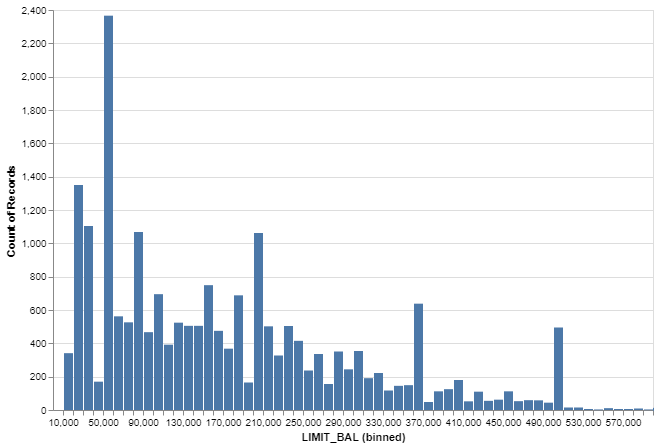

In [8]:
alt.Chart(train_df).mark_bar().encode(
     x=alt.X("LIMIT_BAL", type='quantitative', bin=alt.Bin(step=10_000), scale=alt.Scale(domain=[0, 600_000], clamp=True)),
     y='count()',
     tooltip=alt.Tooltip(['count()'], bin="binned")
).properties(
    width=600,
    height=400,
)

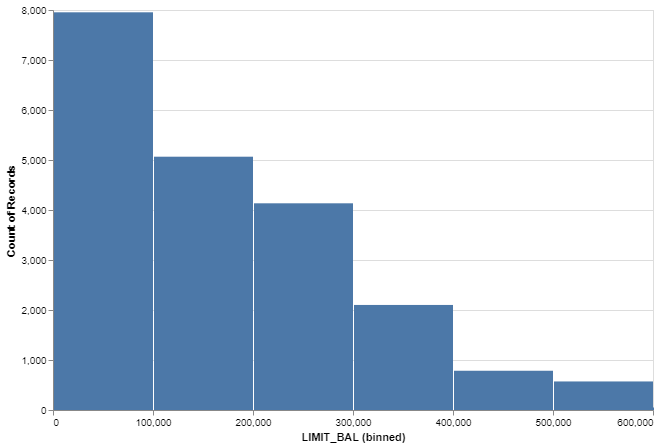

In [9]:
alt.Chart(train_df).mark_bar().encode(
     x=alt.X("LIMIT_BAL", type='quantitative', bin=alt.Bin(maxbins=10), scale=alt.Scale(domain=[0, 600_000], clamp=True)),
     y='count()',
     tooltip=alt.Tooltip(['count()'], bin="binned")
).properties(
    width=600,
    height=400,
)

We can see that `LIMIT_BAL` is right skewed with the most number of individuals having a balance limit of less than `200 000`

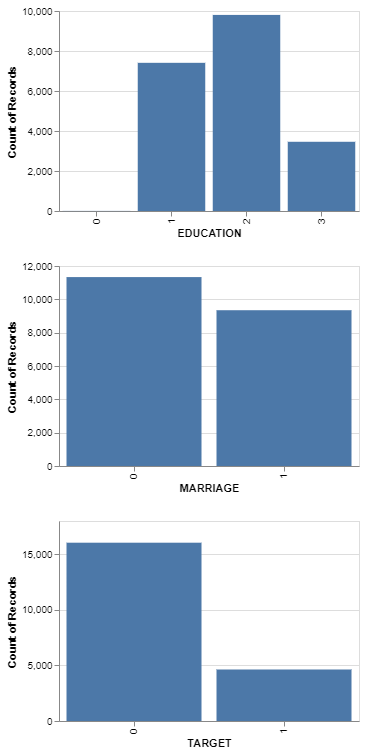

In [10]:
categorical_cols = ['EDUCATION', 'MARRIAGE', 'TARGET']

alt.Chart(train_df).mark_bar().encode(
     x=alt.X(alt.repeat("row"), type='ordinal', scale=alt.Scale(domainMax=250_000, clamp=True)),
     y='count()',
).properties(
    width=300,
    height=200,
).repeat(
    row = categorical_cols
)

We can see that on `MARRIAGE` the dataset is approxiatly balanced. 

On `EDUCATION` we see that the data is unbalanced with most individuals having a univeristy degree (2) followed by graduate degree (1) with the fewest having only a highschool diploma.

On our `TARGET` class, "default.payment.next.month" we see the data is skewed with more examples of people not defaulting. 

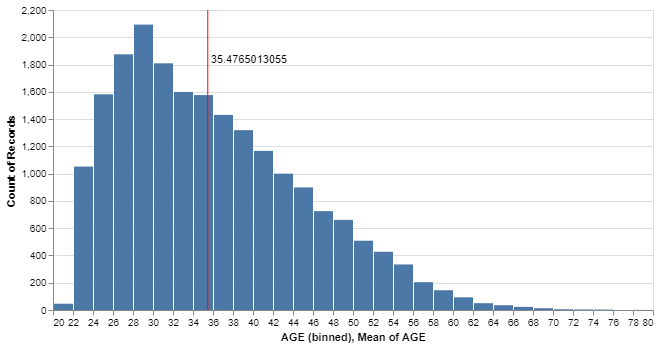

In [11]:
bar = alt.Chart(train_df).mark_bar().encode(
    x=alt.X("AGE", bin=alt.Bin(step=2)),
    y='count()'
)

rule = alt.Chart(train_df).mark_rule(color='red').encode(
    x='mean(AGE):Q'
)

text = rule.mark_text(
    align='left',
    baseline='middle',
    dy = -100,
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='mean(AGE)'
)

(bar + rule + text).properties(width=600)

We see the mean age of the dataset is 35.4 and is right skewed. 

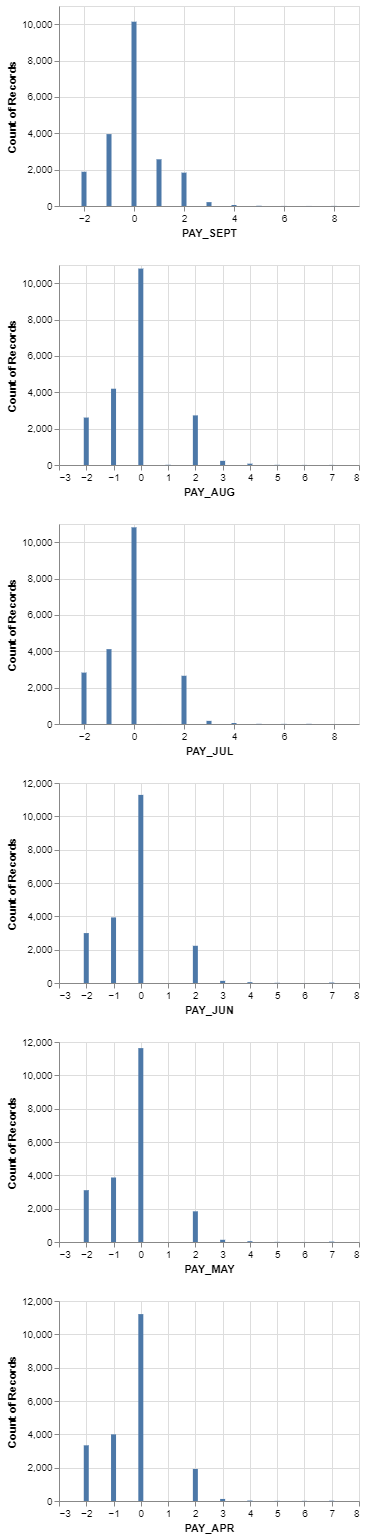

In [12]:
pay_rows = ['PAY_SEPT', 'PAY_AUG',
       'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']

alt.Chart(train_df).mark_bar().encode(
     x=alt.X(alt.repeat("row"), type='quantitative'),
     y='count()',
).properties(
    width=300,
    height=200,
).repeat(
    row = pay_rows
)

We can see that on `PAY` most observations are 0 (minimum payment met), then -1 (paid fully), -2 (no balance to pay)

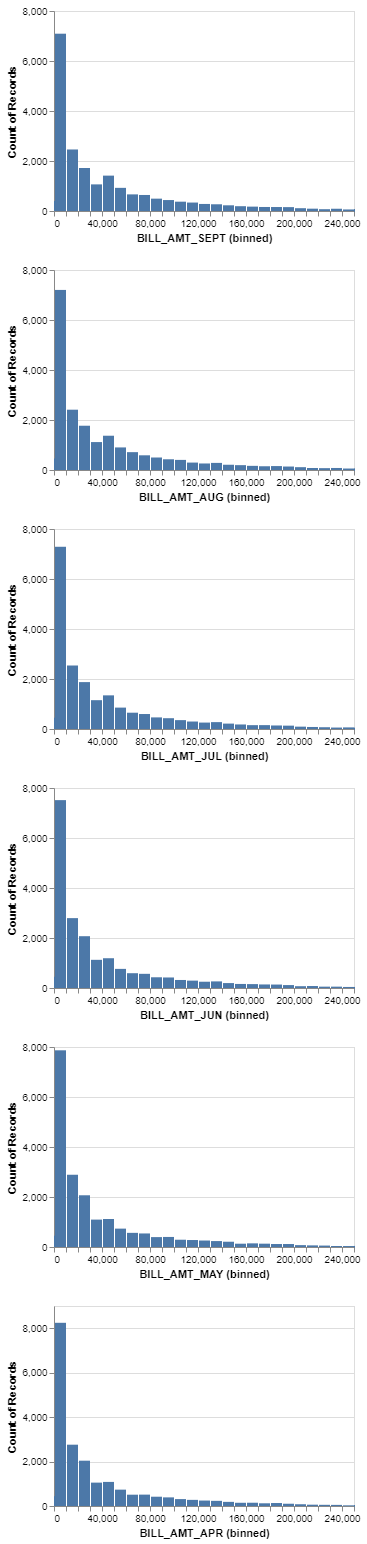

In [13]:
bill_amt_rows = ['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
                'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',]

alt.Chart(train_df).mark_bar().encode(
     x=alt.X(alt.repeat("row"), type='quantitative', bin=alt.Bin(step=10_000), scale=alt.Scale(domain=[0, 250_000], clamp=True)),
     y='count()',
).properties(
    width=300,
    height=200,
).repeat(
    row = bill_amt_rows
)

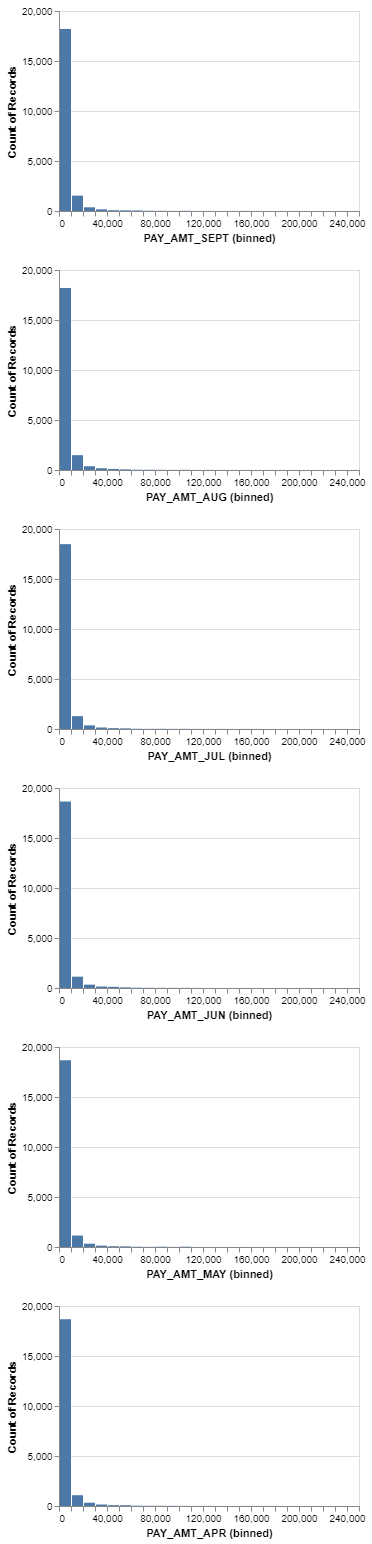

In [14]:
pay_amt_rows = ['PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
                'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']

alt.Chart(train_df).mark_bar().encode(
     x=alt.X(alt.repeat("row"), type='quantitative', bin=alt.Bin(step=10_000), scale=alt.Scale(domainMax=250_000, clamp=True)),
     y='count()'
).properties(
    width=300,
    height=200,
).repeat(
    row = pay_amt_rows
)

Similarly, `BILL_AMT` and `PAY_AMT` are right skewed. We have set the domain to be clamped at 250,000 for `BILL_AMT` and `PAY_AMT` as there are very few `BILL_AMT` counts above this values. Interestingly, it seems the median `BILL_AMT` is higher than the median `PAY_AMT` since we see that nearly all counts of `PAY_AMT` is in the 0-10,000 bin, where as `BILL_AMT` is more distributed within higher bins. 

In [15]:
traind_df_corr = train_df.corr('spearman')
#traind_df_corr = abs(traind_df_corr)
traind_df_corr.style.background_gradient()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,TARGET
LIMIT_BAL,1.000000,-0.280318,0.111460,0.187134,-0.298485,-0.345105,-0.331399,-0.309951,-0.281934,-0.266886,0.055471,0.049474,0.060001,0.073076,0.080486,0.088958,0.273720,0.274520,0.282048,0.281680,0.292773,0.313722,-0.171126
EDUCATION,-0.280318,1.000000,0.165128,0.162288,0.146613,0.181535,0.172834,0.162178,0.142582,0.132737,0.087486,0.085199,0.075786,0.065343,0.059162,0.056492,-0.057877,-0.057019,-0.050572,-0.049482,-0.053069,-0.052756,0.059106
MARRIAGE,0.111460,0.165128,1.000000,0.480285,-0.019231,-0.035299,-0.039666,-0.042535,-0.045506,-0.048214,-0.001327,-0.004474,-0.001693,-0.005040,-0.003747,-0.007001,-0.000219,0.013410,0.007440,0.012928,0.007810,0.010473,0.027087
AGE,0.187134,0.162288,0.480285,1.000000,-0.069590,-0.086970,-0.086998,-0.081963,-0.084211,-0.079558,-0.000213,0.000901,0.000506,-0.004477,-0.000487,0.000051,0.031253,0.046596,0.029930,0.039394,0.038032,0.037670,0.001139
PAY_SEPT,-0.298485,0.146613,-0.019231,-0.069590,1.000000,0.621364,0.546702,0.514471,0.484988,0.464614,0.309597,0.325871,0.311523,0.303971,0.297595,0.287579,-0.099611,-0.058740,-0.056408,-0.030236,-0.030614,-0.049815,0.285484
PAY_AUG,-0.345105,0.181535,-0.035299,-0.086970,0.621364,1.000000,0.801446,0.712057,0.672455,0.636390,0.571346,0.551408,0.516488,0.496937,0.476375,0.456584,0.022135,0.085846,0.084354,0.093319,0.097196,0.076954,0.214913
PAY_JUL,-0.331399,0.172834,-0.039666,-0.086998,0.546702,0.801446,1.000000,0.802859,0.718832,0.671292,0.526059,0.590569,0.558893,0.534645,0.509111,0.488079,0.216314,0.044159,0.101247,0.116836,0.126226,0.093269,0.195025
PAY_JUN,-0.309951,0.162178,-0.042535,-0.081963,0.514471,0.712057,0.802859,1.000000,0.818288,0.731446,0.511765,0.556672,0.616531,0.590531,0.558515,0.532787,0.186859,0.249033,0.062423,0.141586,0.161506,0.138575,0.174064
PAY_MAY,-0.281934,0.142582,-0.045506,-0.084211,0.484988,0.672455,0.718832,0.818288,1.000000,0.822060,0.501570,0.540684,0.588530,0.649996,0.618544,0.580976,0.180773,0.227512,0.257649,0.105278,0.183792,0.172834,0.161524
PAY_APR,-0.266886,0.132737,-0.048214,-0.079558,0.464614,0.636390,0.671292,0.731446,0.822060,1.000000,0.491087,0.525701,0.562300,0.606950,0.667198,0.630915,0.178595,0.205492,0.233529,0.283954,0.141371,0.196297,0.142040


We see a relativly high correlation between varying months of `PAY`, `BILL_AMT`, and `PAY_AMT`. This could be explained as the values for the current month will likely be similar to the prior month. Ie, the amount an individual spends (Bill amount) will be similar to the amount they spent the prior month.

We can see there is high correlation between `PAY_AMT` and `BILL_AMT`. The highest corelation being between `PAY_AMT` and the prior `BILL_AMT` as the `PAY_AMT_SEPT` would be the payment for `BILL_AMT_AUG`. Furthmore, it makes sense that if the `BILL_AMT` and `PAY_AMT` are correlated month to month, they would also be correlated to each other between months to varying degrees.  

We would expect most often an individual will pay their bill in full, or as much as possible, and that these bills and payments are relatively consistent month to month. 

We also notice that `AGE` and `MARRIAGE` are highly correlated. 

We see that the Target class is most significantly correlated with `PAY` values then `PAY_AMT`. As the probability of deliquency would be most strongly related to how far behind an individual is on their payments and inversely correlated with how much they pay towards their balance. 



<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 4. Feature engineering (Challenging)
rubric={reasoning}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing.
    
</div>

_Points:_ 0.5

In [16]:
...

Ellipsis

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 5. Preprocessing and transformations <a name="5"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 
    
</div>

_Points:_ 4

All numeric feature just need to be simply scaled and the remaining features can be passed through as they are already encoded appropriately.

In [17]:
numeric_features = [
    "LIMIT_BAL",
    "AGE",
    "BILL_AMT_SEPT",
    "BILL_AMT_AUG",
    "BILL_AMT_JUL",
    "BILL_AMT_JUN",
    "BILL_AMT_MAY",
    "BILL_AMT_APR",
    "PAY_AMT_SEPT",
    "PAY_AMT_AUG",
    "PAY_AMT_JUL",
    "PAY_AMT_JUN",
    "PAY_AMT_MAY",
    "PAY_AMT_APR"
]

pass_thru_features = [
    "EDUCATION",
    "MARRIAGE",
    "PAY_SEPT",
    "PAY_AUG",
    "PAY_JUL",
    "PAY_JUN",
    "PAY_MAY",
    "PAY_APR",
]

preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    remainder='passthrough'
)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 6. Baseline model <a name="6"></a>
rubric={accuracy}

**Your tasks:**
1. Train a baseline model for your task and report its performance.
    
</div>

_Points:_ 2

In [18]:
cross_val_results = {}
scoring_list = [
    "accuracy",
    "f1",
    "recall",
    "precision",
]

In [19]:
%%capture --no-display

# The dummy model
dc = make_pipeline(preprocessor, DummyClassifier())

# The mean and std of the cross validated scores for all metrics as a dataframe
cross_val_results['dummy'] = pd.DataFrame(cross_validate(dc, X_train, y_train, return_train_score=True, scoring=scoring_list)).agg(['mean', 'std']).round(3).T

# Show the train and validation scores
cross_val_results['dummy']

,mean,std
fit_time,0.023,0.002
score_time,0.020,0.006
test_accuracy,0.776,0.000
train_accuracy,0.776,0.000
test_f1,0.000,0.000
train_f1,0.000,0.000
test_recall,0.000,0.000
train_recall,0.000,0.000
test_precision,0.000,0.000
train_precision,0.000,0.000


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 7. Linear models <a name="7"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the regularization hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.
    
</div>

_Points:_ 8

We can see that a `LogisticRegression` model acheives a CV test f1 score of 0.476 (std 0.005) with the optimized parameters of `C = 0.017378008287491843` and `class_weight = 'balanced'`

In [20]:
# The ridge model pipeline
lr = make_pipeline(preprocessor, LogisticRegression())

cross_val_results['LogisticRegression'] = pd.DataFrame(cross_validate(lr, X_train, y_train, return_train_score=True, scoring=scoring_list, n_jobs=-1)).agg(['mean', 'std']).round(3).T

cross_val_results['LogisticRegression']

,mean,std
fit_time,0.199,0.018
score_time,0.022,0.004
test_accuracy,0.807,0.002
train_accuracy,0.808,0.001
test_f1,0.355,0.007
train_f1,0.356,0.010
test_recall,0.237,0.007
train_recall,0.238,0.008
test_precision,0.713,0.025
train_precision,0.711,0.004


In [21]:
param_grid_lr = {
    "logisticregression__C": 10.0 ** np.arange(-4, 4, 0.01),
    "logisticregression__class_weight": [None, 'balanced']
}

random_search_lr = RandomizedSearchCV(
    lr, 
    param_distributions=param_grid_lr, 
    n_jobs=-1,
    n_iter=20,
    return_train_score=True, 
    random_state=123,
    scoring=scoring_list,
    refit="f1"
)

random_search_lr.fit(X_train, y_train)

display(pd.DataFrame(random_search_lr.cv_results_)[
    [
        "param_logisticregression__C",
        "mean_test_accuracy",
        "mean_test_f1",
        "mean_test_recall",
        "mean_test_precision",
        "rank_test_f1"
    ]
].set_index("rank_test_f1").sort_index())

print(random_search_lr.best_params_['logisticregression__C'])
print(random_search_lr.best_params_['logisticregression__class_weight'])


,param_logisticregression__C,mean_test_accuracy,mean_test_f1,mean_test_recall,mean_test_precision
rank_test_f1,,,,,
1,0.017378,0.686684,0.476453,0.636246,0.380882
2,4.677351,0.686442,0.475761,0.634951,0.380458
3,1548.816619,0.686442,0.475761,0.634951,0.380457
3,7.24436,0.686442,0.475761,0.634951,0.380457
5,13.803843,0.686394,0.475722,0.634951,0.380408
6,15.135612,0.686345,0.475684,0.634951,0.380359
7,0.069183,0.686442,0.475672,0.634736,0.380426
8,0.002042,0.687748,0.475655,0.632147,0.381347
9,0.001479,0.687893,0.473655,0.626753,0.380734


0.017378008287491843
balanced


In [22]:
lr_best = make_pipeline(preprocessor, LogisticRegression(C=random_search_lr.best_params_['logisticregression__C'], class_weight=random_search_lr.best_params_['logisticregression__class_weight']))

cross_val_results['LogisticRegression_Best_C'] = pd.DataFrame(cross_validate(lr_best, X_train, y_train, return_train_score=True, scoring=scoring_list, n_jobs=-1)).agg(['mean', 'std']).round(3).T

cross_val_results['LogisticRegression_Best_C']

,mean,std
fit_time,0.163,0.004
score_time,0.026,0.007
test_accuracy,0.687,0.004
train_accuracy,0.690,0.006
test_f1,0.476,0.005
train_f1,0.480,0.003
test_recall,0.636,0.015
train_recall,0.639,0.004
test_precision,0.381,0.004
train_precision,0.385,0.005


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 8. Different models <a name="8"></a>
rubric={accuracy,reasoning}

**Your tasks:**
1. Try out three other models aside from the linear model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat the performance of the linear model? 
    
</div>

_Points:_ 10

_Upon examination of the results below for the `SVC`, `RandomForest`, and `LightGBM` models we can see that all of them are over-fitting the data to some degree.  The `RandomForest` model is over-fitting the most by far, followed by `LightGBM`, and then `SVC`which is only slightly over-fitting.  However, in terms of performance during cross-validation (using the `f1` score as the scoring metric) all three models are producing similar scores as all three range from 0.454 to 0.469, with `SVC` being the lowest and `RandomForest` being the highest.  When looking at the fit and score times, `LightGBM` is by far the fastest of the three and `SVC` is significantly slower than both of the other models.  Overall, in terms of performance all three of these models are performing better than the initial linear model with higher cross-validation scores.  Although, the linear model is overfitting the data the least.  All things considered, it appears that either the `SVC` or `LightGBM` model would be the best models with which to move forward._

In [23]:
# SVC
pipe_svc = make_pipeline(
    preprocessor, 
    SVC(random_state=123)
)

cross_val_results["SVC"] = pd.DataFrame(cross_validate(pipe_svc, 
                                                       X_train, 
                                                       y_train, 
                                                       return_train_score=True, 
                                                       scoring=scoring_list)).agg(['mean', 'std']).round(3).T
cross_val_results["SVC"]

,mean,std
fit_time,21.569,0.618
score_time,6.851,0.091
test_accuracy,0.817,0.005
train_accuracy,0.821,0.001
test_f1,0.454,0.014
train_f1,0.470,0.006
test_recall,0.340,0.013
train_recall,0.354,0.007
test_precision,0.682,0.025
train_precision,0.701,0.002


In [24]:
# RFC

pipe_random_forest = make_pipeline(
    preprocessor,
    RandomForestClassifier(random_state=123)
)

cross_val_results["RandomForest"] = pd.DataFrame(cross_validate(pipe_random_forest, X_train, y_train,  return_train_score = True, scoring=scoring_list)).agg(['mean', 'std']).round(3).T
cross_val_results["RandomForest"]

,mean,std
fit_time,7.806,0.197
score_time,0.190,0.006
test_accuracy,0.812,0.005
train_accuracy,0.999,0.000
test_f1,0.469,0.015
train_f1,0.998,0.000
test_recall,0.370,0.017
train_recall,0.998,0.001
test_precision,0.642,0.020
train_precision,0.998,0.000


In [25]:
# LightGBM
pipe_LGBM = make_pipeline(
    preprocessor,
    LGBMClassifier(random_state=123)
)

cross_val_results["LigtGBM"] = pd.DataFrame(cross_validate(pipe_LGBM, X_train, y_train,  return_train_score = True, scoring=scoring_list)).agg(['mean', 'std']).round(3).T
cross_val_results["LigtGBM"]

,mean,std
fit_time,0.287,0.096
score_time,0.024,0.000
test_accuracy,0.815,0.005
train_accuracy,0.853,0.003
test_f1,0.466,0.012
train_f1,0.581,0.012
test_recall,0.361,0.012
train_recall,0.455,0.012
test_precision,0.658,0.027
train_precision,0.804,0.007


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 9. Feature selection (Challenging)
rubric={reasoning}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV`, forward selection or L1 regularization for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises unless you think there are other benefits with using less features.
    
</div>

_Points:_ 0.5

_Type your answer here, replacing this text._

In [26]:
...

Ellipsis

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 10. Hyperparameter optimization
rubric={accuracy,reasoning}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 
    
</div>

_Points:_ 6

_After hyperparameter optimization for our three models we can see the following:_

_The `SVC` model achieves a CV test `f1` score of 0.534 with the optimized parameters of gamma = 0.01, C = 10, and class_weight = 'balanced'_

_The `RandomForest` model achieves a CV test `f1` score of 0.542 with the optimized parameters of n_estimators = 350, max_features = 8, max_depth = 4, and class_weight = 'balanced'_

_The `LightGBM` model achieves a CV test `f1` score of 0.476 with the optimized parameters of num_leaves = 4, n_estimators= 458, max_depth = 282 and class_weight = 'balanced'_

In [27]:
# SVC
param_grid_svc = {
    "svc__C": 10.0 ** np.arange(-2, 3),
    "svc__gamma": 10.0 ** np.arange(-2, 3),
    "svc__class_weight": [None, "balanced"]
}

random_search_svc = RandomizedSearchCV(
    pipe_svc, 
    param_distributions=param_grid_svc, 
    n_jobs=-1, 
    n_iter=50, 
    cv=5, 
    return_train_score=True, 
    random_state=123,
    scoring='f1'
)

random_search_svc.fit(X_train, y_train)

best_random_search_score_svc = random_search_svc.best_score_
best_params_svc = random_search_svc.best_params_

print("The best cross-val test score for SVC is {random_search_svc.best_score_:.3f}")
print(f"The best parameters for SVC are \n {random_search_svc.best_params_}")

The best cross-val test score for SVC is {random_search_svc.best_score_:.3f}
The best parameters for SVC are 
 {'svc__gamma': 0.01, 'svc__class_weight': 'balanced', 'svc__C': 10.0}


In [28]:
# RFC

param_grid_rf = {
    "randomforestclassifier__max_features": np.arange(2, 22, 1),
    "randomforestclassifier__max_depth": np.arange(2, 100, 2),
    "randomforestclassifier__n_estimators": np.arange(2, 500, 2),
    "randomforestclassifier__class_weight": ['balanced', None]
}

random_search_rf = RandomizedSearchCV(
    pipe_random_forest,
    param_distributions=param_grid_rf,
    n_jobs=-1,
    n_iter=50,
    cv=5,
    random_state=123,
    scoring='f1'
)

random_search_rf.fit(X_train, y_train)

print(f"The best cross-val test score for RandomForest is {random_search_rf.best_score_:.3f}")
print(f"The best parameters for RandomForest are \n {random_search_rf.best_params_}")

The best cross-val test score for RandomForest is 0.542
The best parameters for RandomForest are 
 {'randomforestclassifier__n_estimators': 350, 'randomforestclassifier__max_features': 8, 'randomforestclassifier__max_depth': 4, 'randomforestclassifier__class_weight': 'balanced'}


In [29]:
# LightGBM
param_grid_lgbm = {
    "lgbmclassifier__num_leaves": np.arange(2, 100, 2),
    "lgbmclassifier__max_depth": np.arange(2, 500, 2),
    "lgbmclassifier__n_estimators": np.arange(2, 500, 2),
    "lgbmclassifier__class_weight": ['balanced', None]
}

random_search_lgbm = RandomizedSearchCV(
    pipe_LGBM,
    param_distributions=param_grid_lgbm,
    n_jobs=-1,
    n_iter=50,
    cv=5,
    random_state=123,
    scoring='f1'
)

random_search_lgbm.fit(X_train, y_train)

print(f"The best cross-val test score for LightGBM is {random_search_lgbm.best_score_:.3f}")
print(f"The best parameters for LightGBM are \n {random_search_lgbm.best_params_}")

The best cross-val test score for LightGBM is 0.544
The best parameters for LightGBM are 
 {'lgbmclassifier__num_leaves': 4, 'lgbmclassifier__n_estimators': 458, 'lgbmclassifier__max_depth': 282, 'lgbmclassifier__class_weight': 'balanced'}


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 11. Interpretation and feature importances <a name="1"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 
    
</div>

_Points:_ 8

_To examine the most important features of our `LightGBM` model we first checked if we had any highly correlated features.  Based on the results (below where 0.70 was arbitrarily set as a threshold for high correlation) we can see that there are a number of columns that are highly correlated.  Upon examining the columns these correlations make sense as the bill amount from month to month is likely to be similar, as is the payment status of an individual from month to month.  Thus, there may be some multi-collinearity present in our model._

_Feature importance was examined using the `eli5` package and it appears that 'PAY_SEPT' is the most important feature by far with a weight of 0.4681, compared to 'PAY_AUG' in second with a weight of 0.0601 and 'LIMIT_BAL' in third with a weight of 0.0482.  'PAY_SEPT' is also seen as the most important feature in the figure below showing the permutation feature importance of each feature with 'BILL_AMT_JUNE' and 'LIMIT_BAL' a distant second and third, respectively.  Additionally, when looking at the average SHAP values associated with each feature, again 'PAY_SEPT' was shown to be the most important feature with a SHAP value of 0.425, followed by 'LIMIT_BAL' and 'BILL_AMT_SEPT' at 0.238 and 0.161, respectively.  The SHAP summary plot below shows us that higher levels of 'PAY_SEPT' (i.e. more delayed payments) seem to have higher SHAP values for the default class (target = 1), while lower levels of 'PAY_SEPT' have lower SHAP values.  The opposite is seen for 'LIMIT_BAL', where higher levels tend to have lower SHAP values and lower levels tend to have higher SHAP values.  The same trend is also observed in the dependency plot for the 'PAY_SEPT' feature._

_Thus, on a global scale, our model is primarily relying on the most recent repayment status of an individual in order to predict whether or not they will default on their payment next month with their credit limit and trends from preceding months having a lesser impact.  Overall, this makes sense as the previous month's payment status would likely be a significant indicator of whether an individual will be able to make their next payment._

In [31]:
# The code below was taken and adapted from DSCI_573 Lecture 8
preprocessor.fit(X_train)
X_train_enc = preprocessor.transform(X_train)

feature_names = (numeric_features + pass_thru_features)

corr_df = pd.DataFrame(X_train_enc, columns=feature_names).corr().abs()

corr_df[corr_df == 1] = 0

high_corr = [column for column in corr_df.columns if any(corr_df[column] > 0.7)]
print(high_corr)

['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']


In [32]:
import eli5
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

pipe_LGBM_optim = make_pipeline(
    preprocessor,
    LGBMClassifier(num_leaves=4,
                   n_estimators=458,
                   max_depth=282,
                   class_weight='balanced',
                   random_state=123)
)

pipe_LGBM_optim.fit(X_train, y_train)

eli5.explain_weights(
    pipe_LGBM_optim.named_steps["lgbmclassifier"], feature_names=feature_names
)

Weight,Feature
0.4681,PAY_SEPT
0.0601,PAY_AUG
0.0482,LIMIT_BAL
0.0472,BILL_AMT_SEPT
0.0440,PAY_AMT_AUG
0.0401,PAY_AMT_SEPT
0.0372,PAY_JUL
0.0313,PAY_AMT_JUL
0.0251,PAY_AMT_JUN
0.0240,PAY_APR


In [34]:
# The function below was taken and adapted from DSCI_573 Lecture 8

def get_permutation_importance(model):
    X_train_perm = X_train
    result = permutation_importance(model, X_train_perm, y_train, n_repeats=10, random_state=123)
    perm_sorted_idx = result.importances_mean.argsort()
    plt.boxplot(
        result.importances[perm_sorted_idx].T,
        vert=False,
        labels=X_train_perm.columns[perm_sorted_idx],
    )
    plt.xlabel('Permutation feature importance')
    plt.show()

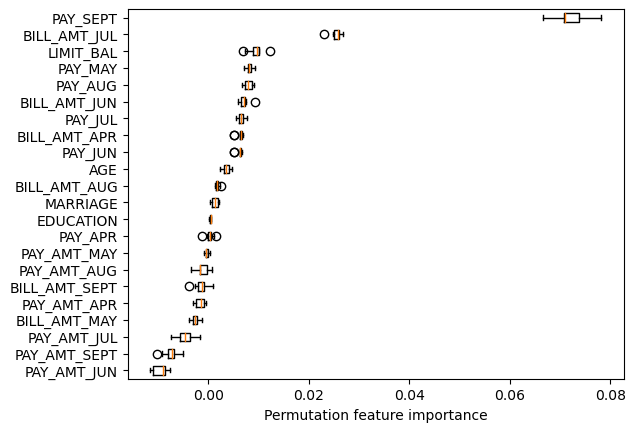

In [35]:
get_permutation_importance(pipe_LGBM_optim)

In [36]:
# The code below was taken and adapted from DSCI_573 Lecture 8

import shap
# load JS visualization code to notebook
shap.initjs()

X_train_enc_df = pd.DataFrame(
    data=preprocessor.transform(X_train),
    columns=feature_names,
    index=X_train.index).round(3)

X_test_enc_df = pd.DataFrame(
    data=preprocessor.transform(X_test),
    columns=feature_names,
    index=X_test.index).round(3)

lgbm_explainer = shap.TreeExplainer(pipe_LGBM_optim.named_steps["lgbmclassifier"])
train_lgbm_shap_values = lgbm_explainer.shap_values(X_train_enc_df)
test_lgbm_shap_values = lgbm_explainer.shap_values(X_test_enc_df)

C:\Users\vikra\.conda\envs\573\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [37]:
# The code below was taken and adapted from DSCI_573 Lecture 8

shap_values = np.abs(train_lgbm_shap_values[1]).mean(0)
pd.DataFrame(data=shap_values, 
             index=feature_names, 
             columns=["SHAP"]).sort_values(by="SHAP", ascending=False)

,SHAP
PAY_SEPT,0.425384
LIMIT_BAL,0.238496
BILL_AMT_SEPT,0.161353
PAY_AMT_SEPT,0.142500
PAY_AMT_AUG,0.139553
PAY_AMT_JUN,0.119712
BILL_AMT_JUL,0.092959
PAY_AUG,0.086199
BILL_AMT_JUN,0.081816
PAY_JUL,0.080980


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


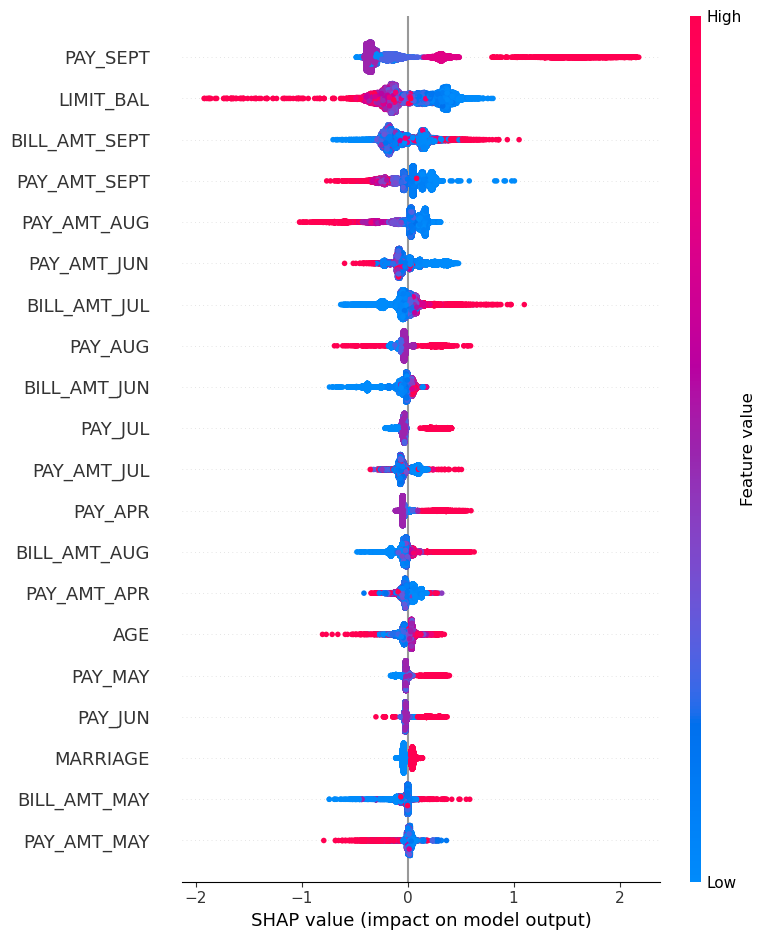

In [38]:
shap_summary_plot = shap.summary_plot(train_lgbm_shap_values[1], X_train_enc_df)
shap_summary_plot

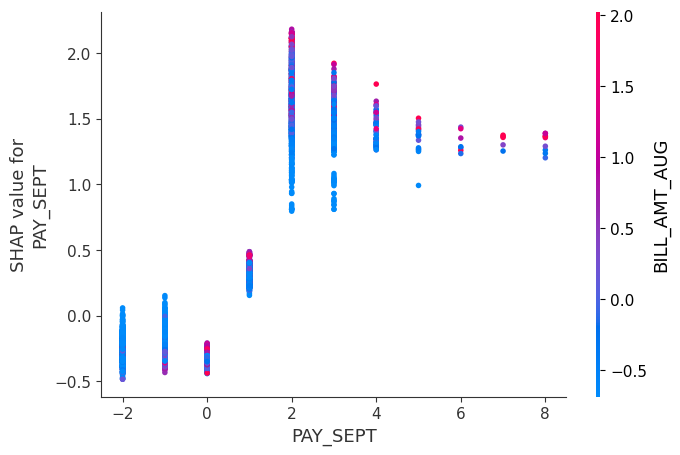

In [39]:
pay_sept_dependence_plot = shap.dependence_plot("PAY_SEPT", train_lgbm_shap_values[1], X_train_enc_df)
pay_sept_dependence_plot

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 12. Results on the test set <a name="12"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain them with SHAP force plots.  
    
</div>

_Points:_ 6

_The f1 score of our best performing model, the optimized `LightGBM`, on the test set is 0.537, which is reasonable given the fact that our mean validation score on the training set was 0.466 using the default parameter settings.  These scores are comparable and it's possible that the test score is higher than the validation score due to the optimization of the model. While this score is not very high, it does appear that our model is generalizing well on unseen data; however, given the high level of error we cannot trust this model to a high extent in terms of accurately predicting whether an individual will default on their next credit card bill payment._

In [40]:
from sklearn.metrics import f1_score

f1_score(y_test, random_search_lgbm.predict(X_test)).round(3)

0.537

In [41]:
y_test_reset = y_test.reset_index(drop=True)

default_individuals = y_test_reset[y_test_reset == 1].index.tolist()
non_default_individuals = y_test_reset[y_test_reset == 0].index.tolist()

default_example_ind = default_individuals[1]
non_default_example_ind = non_default_individuals[1]

In [42]:
pipe_LGBM_optim.named_steps["lgbmclassifier"].predict(X_train_enc, 
                                                      raw_score=True).mean().round(3)

-0.335

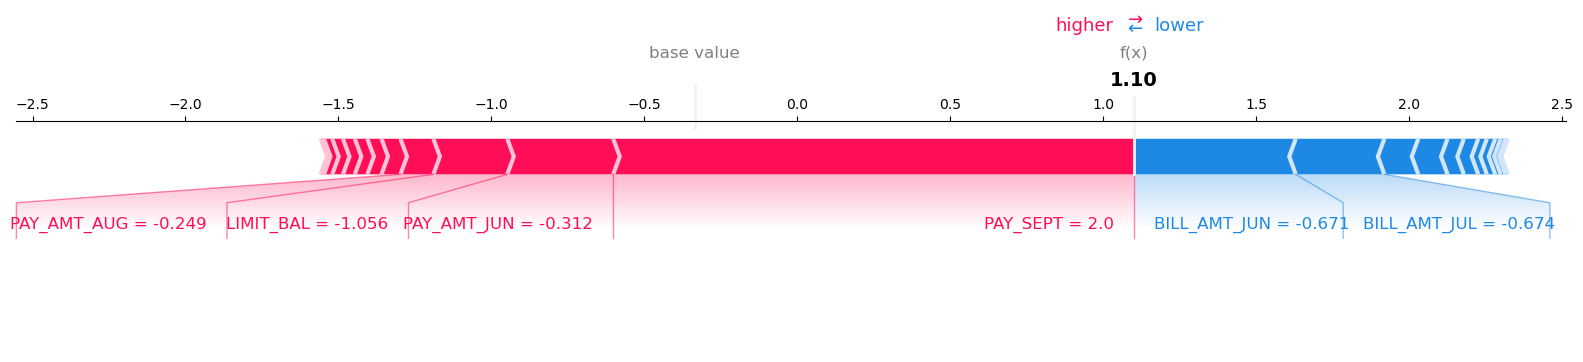

In [43]:
# Force Plot for default class (target = 1) example

shap.force_plot(
    lgbm_explainer.expected_value[1],  
    test_lgbm_shap_values[1][default_example_ind, :], 
    X_test_enc_df.iloc[default_example_ind, :], 
    matplotlib=True,
)

_The force plot above for a default class example shows that the raw model score is larger than the base value (1.10 > -0.355), thus the prediction for this example was class 1 which means this individual would default on their next payment.  For this specific example 'PAY_AMT_AUG' = -0.249, 'LIMIT_BAL' = -1.056, 'PAY_AMT_JUN' = -0.312, and 'PAY_SEPT' = 2.0 are pushing the prediction towards a higher score, while 'BILL_AMT_JUN' = -0.671 and 'BILL_AMT_JUL' = -0.674 are pushing this prediction towards a lower score._

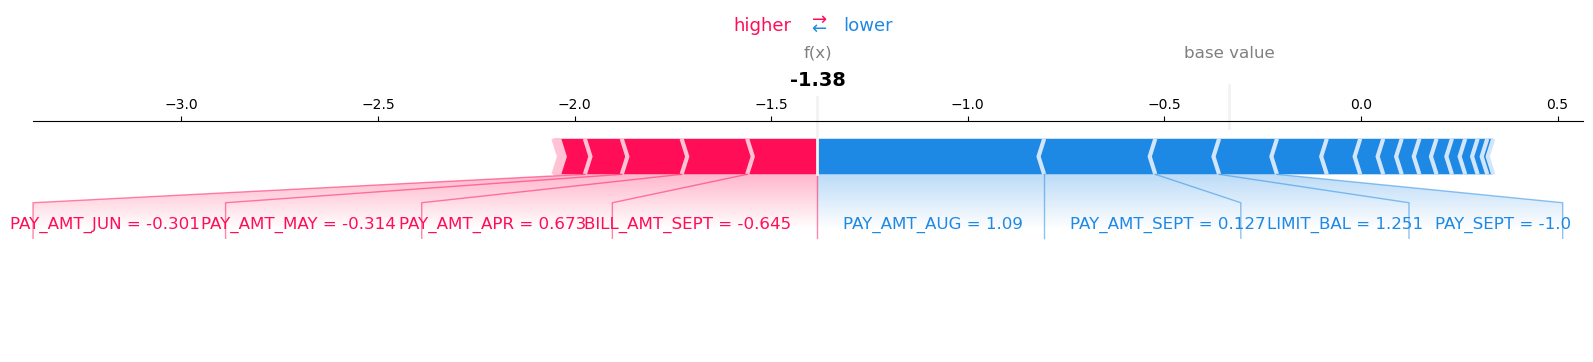

In [44]:
# Force Plot for non-default class (target = 0) example

shap.force_plot(
    lgbm_explainer.expected_value[1], 
    test_lgbm_shap_values[1][non_default_example_ind, :],
    X_test_enc_df.iloc[non_default_example_ind, :],
    matplotlib=True,
)

_The force plot above for a non-default class example shows that the raw model score is smaller than the base value (-1.38 < -0.355), thus the prediction for this example was class 0 which means this individual would not default on their next payment.  For this specific example 'PAY_AMT_JUN' = -0.301, 'PAY_AMT_MAY' = -0.314, 'PAY_AMT_APR' = 0.673 and 'BILL_AMT_SEPT' = -0.645 are pushing the prediction towards a higher score, while 'PAY_AMT_AUG' = 1.09, 'PAY_AMT_SEP' = 0.127, 'LIMIT_BAL' = 1.251, and 'PAY_SEPT' = -1 are pushing this prediction towards a lower score._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 13. Summary of results <a name="13"></a>
rubric={reasoning}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook.
    
</div>

_Points:_ 8

**Final Summary**: We decided to show two tables as a summary of all the work that was done. The first compared all the optimized models using cross validation scores (CV) the training set and the second looking at the F1 and Recall score of the test dataset on a subset of models. 

For the first table we compared all the cross validation (CV) scores for all the models. When looking at accuracy we can see that even the Dummy model has performed well, so we can safetly disregard this scoring for comparison among the models. Also reviewing the table, we can see quite clearly that the fit and score time for SVC was drastically higher than the rest, making this an infesible model to use on a large scale. Looking at the remaining scores and models, we see a that both RandomForest and LGM outperformed Logisitic Regression (LogReg) for F1 and precision. However, when looking at Recall score, we can see that both logistic regression and LGM tied at 0.64 on the test score. When comparing the test and training scores within models, we see that there might be slight overfitting happening in the LGM model compared to the other two (LogReg and RandomForest) as the training score is slightly higher than the test scores. Given the results displayed in the CV table and our domain knowledge it made the most sense to focus in on F1 and Recall scores as we are most concerned with reducing false negatives (where the model will guess a credit card client is not defaulting when they will). As a result, for the final summary table we compared the F1 and Recall scores for all models on the test set. 

Looking at the second and final table and overall performance of the LogReg, RandomForest and LGM models, we have two clear contenders for top scores in F1 and Recall. Given that LGM doesn't have the highest score in either Recall and F1, and because it shows a bit of overfitting looking back at the CV scores, this model might not be ideal for our use case. If we are only concerned with Recall scores and reducing false negatives (as we have mentioned earlier), then the ideal model is the Logestic Regression (with a score of 0.654). With the added benefit that a LogReg model will also have a low fit and score time (when looking back at the CV table). However, if we are looking to optimize F1 scores(both precision and recall), then it might be best to go with RandomForest. Overall, given our focus on reducing false positives and with consideration to optimizing time efficiency (if this were to be used for fraud detection this would help reduce system burden), so the ideal model for use would be Logestic Regression with the best Recall score of 0.654.
 
Our model preformance might better be further optimized by re-visiting the features and performing some feature engineering. We have some features that are time-based and therefore are highly correlated, maybe a better metric might have been to average the repayment status columns over the 6 months or exclude some of the bill amount columns with a low weights in the model. We could also try different penalty parameters for the Logestic Regression model (currently we used the default value of L2 penalty) and see how it performs. In our hyper parameter optimization we selected only `C` and class weight, we can re-visit this by adding more hyperparameters and/or perform a grid search for a smaller range of values in each of these parameters. Finally, if we had more time we could look in to how our model classifies and performs by testing it out on specific test or outlier examples. This can assist us in helping us interpret the model and also provide give us some ideas on what other datapoints would be beneficial to collect to improve the model's performance. 

In [45]:
%%capture --no-display

#Hyperparameter optimized models for RandomForest, SVC and LGM
pipe_LGBM_optim = make_pipeline(
    preprocessor,
    LGBMClassifier(num_leaves=4,
                   n_estimators=458,
                   max_depth=282,
                   class_weight='balanced',
                   random_state=123)
)

pipe_SVC_optim = make_pipeline(
    preprocessor,
    SVC(gamma=0.01,
        C=10,
        class_weight='balanced',
        random_state=123)
)

pipe_RF_optim = make_pipeline(
    preprocessor,
    RandomForestClassifier(n_estimators=350,
                           max_features=8,
                           max_depth=4,
                           class_weight='balanced',
                           random_state=123)
)

In [46]:

%%capture --no-display

models_used = {
    "Dummy": dc, 
    "LGM": pipe_LGBM_optim, 
    "LogReg": lr_best,
    "RandomForest": pipe_RF_optim,
    "SVC": pipe_SVC_optim
    }

#A function to retrieve CV scores for all models
def model_get_cv(model_dict):
    final_cv_results = {}
    scoring_list = ["accuracy","f1","recall","precision"]
    
    for model in model_dict:
        final_cv_results[model] = pd.DataFrame(cross_validate(model_dict[model], X_train, y_train,  return_train_score = True, scoring=scoring_list)).agg(['mean', 'std']).round(3).T

    return final_cv_results

In [47]:
%%capture --no-display
#Table 1: Displaying the final training set CV scores of all models
#Modified from code in Lab1 of DSCI 573

pd.concat(
    model_get_cv(models_used),
    axis='columns'  
).xs(
    'mean', 
    axis='columns', 
    level=1 
).style.format(
    precision=2 
).background_gradient(
    axis=None 
)

,Dummy,LGM,LogReg,RandomForest,SVC
fit_time,0.03,0.42,0.11,7.80,13.17
score_time,0.02,0.03,0.02,0.12,4.45
test_accuracy,0.78,0.76,0.69,0.79,0.77
train_accuracy,0.78,0.78,0.69,0.79,0.78
test_f1,0.00,0.54,0.48,0.54,0.53
train_f1,0.00,0.58,0.48,0.55,0.55
test_recall,0.00,0.64,0.64,0.57,0.58
train_recall,0.00,0.69,0.64,0.58,0.60
test_precision,0.00,0.47,0.38,0.52,0.49
train_precision,0.00,0.51,0.39,0.53,0.51


In [49]:
%%capture --no-display

#A function to fit and calculate F1 and Recall scores
def final_F1_recall_test_score(models_dict):
    final_f1_results = {}
    final_recall_results = {}

    for model in models_dict:
        models_dict[model].fit(X_train, y_train)
        final_f1_results[model] = f1_score(y_test, models_dict[model].predict(X_test)).round(3)
        final_recall_results[model] = recall_score(y_test, models_dict[model].predict(X_test)).round(3)
    
    df_1 = pd.DataFrame(final_recall_results, index = ["Recall scores"])
    df_2 = pd.DataFrame(final_f1_results, index = ["F1 scores"])
    final_dataframe = pd.concat([df_1,df_2])

    return final_dataframe

In [50]:
#Table 2: Displaying the final F1 and Recall scores of best models on the Test dataset
final_models = models_used = {
    "LGM": pipe_LGBM_optim, 
    "LogReg": lr_best,
    "RandomForest": pipe_RF_optim
    }

final_F1_recall_test_score(final_models)

,LGM,LogReg,RandomForest
Recall scores,0.634,0.654,0.573
F1 scores,0.537,0.482,0.541


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 14. Creating a data analysis pipeline (Challenging)
rubric={reasoning}

**Your tasks:**
- In 522 you learned how build a reproducible data analysis pipeline. Convert this notebook into scripts and create a reproducible data analysis pipeline with appropriate documentation. Submit your project folder in addition to this notebook on GitHub and briefly comment on your organization in the text box below.
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 15. Your takeaway from the course (Challenging)
rubric={reasoning}

**Your tasks:**

What is your biggest takeaway from this course? 
    
</div>

_Points:_ 0.25

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<div class="alert alert-danger" style="color:black">
    
**Restart, run all and export a PDF before submitting**
    
Before submitting,
don't forget to run all cells in your notebook
to make sure there are no errors
and so that the TAs can see your plots on Gradescope.
You can do this by clicking the ▶▶ button
or going to `Kernel -> Restart Kernel and Run All Cells...` in the menu.
This is not only important for MDS,
but a good habit you should get into before ever committing a notebook to GitHub,
so that your collaborators can run it from top to bottom
without issues.
    
After running all the cells,
export a PDF of the notebook (preferably the WebPDF export)
and upload this PDF together with the ipynb file to Gradescope
(you can select two files when uploading to Gradescope)
</div>

---

## Help us improve the labs

The MDS program is continually looking to improve our courses, including lab questions and content. The following optional questions will not affect your grade in any way nor will they be used for anything other than program improvement:

1. Approximately how many hours did you spend working or thinking about this assignment (including lab time)?

#Ans:

2. Do you have any feedback on the lab you be willing to share? For example, any part or question that you particularly liked or disliked?

#Ans: